Loss_SGD: 99339.1738087
Loss_SGD: 83817.2357068
Loss_SGD: 69843.0086405
Loss_SGD: 57367.1671018
Loss_SGD: 45952.5107061
Loss_SGD: 35779.379502
Loss_SGD: 27310.1856508
Loss_SGD: 20493.2436583
Loss_SGD: 15071.3568583
Loss_SGD: 10877.8980608
Loss_SGD: 9295.19799544
Loss_SGD: 9786.88389913
Loss_SGD: 11096.6143698
Loss_SGD: 12431.8136048
Loss_SGD: 13618.7313987
Loss_SGD: 14700.8309627
Loss_SGD: 15643.7187857
Loss_SGD: 16519.5593559
Loss_SGD: 17300.0787295
Loss_SGD: 17928.4081659
Loss_SGD: 18539.2214594
Loss_SGD: 19101.3469243
Loss_SGD: 19629.4748431
Loss_SGD: 20079.1677703
Loss_SGD: 20472.6338047
Loss_SGD: 20883.2296365
Loss_SGD: 21229.612885
Loss_SGD: 21452.4904079
Loss_SGD: 21859.0364806
Loss_SGD: 22088.6068449
Loss_SGD: 22325.0326731
Loss_SGD: 22485.2440181
Loss_SGD: 22653.1942287
Loss_SGD: 22811.6619184
Loss_SGD: 22911.6210386
Loss_SGD: 22959.5883466
Loss_SGD: 23081.5847244
Loss_SGD: 23243.7528651
Loss_SGD: 23297.8327907
Loss_SGD: 23380.9544242
Loss_SGD: 23543.6123954
Loss_SGD: 23563.76

delta_theta -0.000113804510225
theta: 0.614294251588
Loss_AdaDelta: 116237.976439
delta_theta -0.000107547321313
theta: 0.614186704266
Loss_AdaDelta: 116215.001328
delta_theta -0.000101809243155
theta: 0.614084895023
Loss_AdaDelta: 116192.670054
delta_theta -9.32118967396e-05
theta: 0.613991683127
Loss_AdaDelta: 116171.603038
delta_theta -9.22156958263e-05
theta: 0.613899467431
Loss_AdaDelta: 116151.657443
delta_theta -9.00751168284e-05
theta: 0.613809392314
Loss_AdaDelta: 116132.368277
delta_theta -8.87968675485e-05
theta: 0.613720595446
Loss_AdaDelta: 116113.374839
delta_theta -8.50632472283e-05
theta: 0.613635532199
Loss_AdaDelta: 116094.86526
delta_theta -8.30783974609e-05
theta: 0.613552453802
Loss_AdaDelta: 116077.033266
delta_theta -8.26516648038e-05
theta: 0.613469802137
Loss_AdaDelta: 116059.675718
delta_theta -7.7317277093e-05
theta: 0.61339248486
Loss_AdaDelta: 116042.83418
delta_theta -7.65487696158e-05
theta: 0.61331593609
Loss_AdaDelta: 116026.596451
delta_theta -7.584503

Loss_Adam: 28126.7059359
Loss_Adam: 27413.4774917
Loss_Adam: 26718.1594607
Loss_Adam: 26092.2407939
Loss_Adam: 25502.8517303
Loss_Adam: 24981.9020668
Loss_Adam: 24529.9795714
Loss_Adam: 24151.9683896
Loss_Adam: 23823.1725081
Loss_Adam: 23572.3237902
Loss_Adam: 23397.3443738
Loss_Adam: 23287.6132325
Loss_Adam: 23232.9055186
Loss_Adam: 23233.7872383
Loss_Adam: 23272.4827891
Loss_Adam: 23336.2999379
Loss_Adam: 23413.4135293
Loss_Adam: 23469.9246246
Loss_Adam: 23518.2323984
Loss_Adam: 23573.9070669
Loss_Adam: 23623.6148928
Loss_Adam: 23671.4279251
Loss_Adam: 23716.0095545
Loss_Adam: 23785.0032126
Loss_Adam: 23861.5890578
Loss_Adam: 23946.0069456
Loss_Adam: 24045.0910501
Loss_Adam: 24105.465274
Loss_Adam: 24155.2635235
Loss_Adam: 24209.4804052
Loss_Adam: 24275.745177
Loss_Adam: 24340.8209657
Loss_Adam: 24414.5795855
Loss_Adam: 24465.1680799
Loss_Adam: 24472.8188164
Loss_Adam: 24463.2796004
Loss_Adam: 24425.1967801
Loss_Adam: 24385.7002676
Loss_Adam: 24340.1641104
Loss_Adam: 24294.1626936
Lo

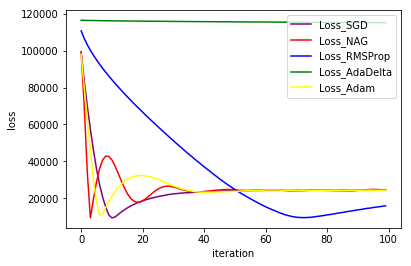

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from scipy.sparse import hstack, csr_matrix
from sklearn import datasets


def data_loader(file):
    X, Y = datasets.load_svmlight_file(file, n_features=123)
    one = np.ones((X.shape[0], 1))
    X = hstack([X, csr_matrix(one)]).toarray()
    Y = np.array(Y).reshape(X.shape[0], 1)
    return X, Y


def select_sample(X, Y, n, index_list):  # 随机抽出样本再组合
    sample_index = random.sample(index_list, n)
    X_samples = np.ones((0, X.shape[1]))
    Y_samples = np.ones((0, Y.shape[1]))

    for item in sample_index:
        X_samples = np.r_[X_samples, X[item].reshape(1, X.shape[1])]
        Y_samples = np.r_[Y_samples, Y[item].reshape(1, Y.shape[1])]
    index = (1 - Y_samples * X_samples.dot(theta) < 0)
    y = Y_samples.copy()
    y[index] = 0
    return X_samples, y


def SGD(theta, learning_rate, epoch=100):  # 得到随机梯度

    for j in range(1, epoch + 1):  # 迭代200次，每次samplenumber个样本
        X, Y = select_sample(X_train, Y_train, samplesnumber, index_list)  # 选取样本


        epsilon_gredient = -np.dot(X.transpose(), Y)  #
        gradient = theta + C * epsilon_gredient/Y.shape[0]
        theta = theta - learning_rate * gradient
        loss = loss_funtion(X_test, Y_test, theta)
        print("Loss_SGD:", loss)
        Loss_SGD.append(loss)
    return Loss_SGD


def NAG(theta, learning_rate, lunda, epoch=100):  # NAG
    Vt = np.zeros(theta.shape)
    for j in range(1, epoch + 1):
       # m_gradient = np.zeros(theta.shape)
        X, Y = select_sample(X_train, Y_train, samplesnumber, index_list)  # 选取样本

        epsilon_gredient = -np.dot(X.transpose(), Y)  #
        gradient =(theta - lengta * Vt) + C * epsilon_gredient/Y.shape[0]
        Vt = lengta * Vt + learning_rate * gradient
        theta = theta - Vt
        loss = loss_funtion(X_test, Y_test, theta)
        print("Loss_NAG:", loss)
        Loss_NAG.append(loss)

    return Loss_NAG


def RMSProp(theta, epoch=100):  # RMSProp
    epsilon = 1e-8
    lengta = 0.9
    learning_rate = 0.01
    Gt = np.zeros(theta.shape)
    for j in range(1, epoch + 1):
        # 这里的学习率 0.001
        X, Y = select_sample(X_train, Y_train, samplesnumber, index_list)  # 选取样本

        epsilon_gredient = -np.dot(X.transpose(), Y)  #
        gradient = theta + C * epsilon_gredient/Y.shape[0]
        Gt = lengta * Gt + (1 - lengta) * gradient * gradient
        theta = theta - learning_rate * gradient / np.sqrt(Gt + epsilon)
        loss = loss_funtion(X_test, Y_test, theta)
        print("Loss_RMSProp:", loss)
        Loss_RMSProp.append(loss)

    return Loss_RMSProp


def AdaDelta(theta, epoch=100):  # AdaDelta,无初始学习率,用sqrt{Delta_{t-1} + epsilon}来估计学习速率,lengda=0.95
    lengda = 0.999  # yuan0.95
    epsilon = 1e-8
    delta_t = np.zeros(theta.shape)
    Gt = np.zeros(theta.shape)
    for j in range(1, epoch + 1):

        X, Y = select_sample(X_train, Y_train, samplesnumber, index_list)  # 选取样本
        epsilon_gredient = -np.dot(X.transpose(), Y)  #
        gradient = theta + C * epsilon_gredient/Y.shape[0]

        Gt = lengda * Gt + np.sum((1 - lengda) * (gradient ** 2))
        delta_theta = -np.sqrt(delta_t + epsilon) / np.sqrt(Gt + epsilon) * gradient
        theta = theta + delta_theta  # 偷*learning_rate
        delta_t = lengda * delta_t + (1 - lengda) * delta_theta * delta_theta
        loss = loss_funtion(X_test, Y_test, theta)
        print("delta_theta",delta_theta[0][0])
        print("theta:", theta[0][0])
        print("Loss_AdaDelta:", loss)
        Loss_AdaDelta.append(loss)
    return Loss_AdaDelta


def Adam(theta, epoch=100):  # 和Adam  \beta_1取个0.9（可能需要衰减）
    beta_1 = 0.9
    lengda = 0.999
    learning_rate = 0.1
    epsilon = 1e-8
    m_t = np.zeros(theta.shape)
    Gt = np.zeros(theta.shape)
    for j in range(1, epoch + 1):
        X, Y = select_sample(X_train, Y_train, samplesnumber, index_list)  # 选取样本
        epsilon_gredient = -np.dot(X.transpose(), Y)  #
        gradient = theta + C * epsilon_gredient/Y.shape[0]

        m_t = beta_1 * m_t + (1 - beta_1) * gradient
        Gt = lengda * Gt + (1 - lengda) * gradient * gradient
        alpha = learning_rate * math.sqrt(1 - pow(lengda, j)) / (1 - pow(beta_1, j))
        theta = theta - alpha * m_t / np.sqrt(Gt + epsilon)
        loss = loss_funtion(X_test, Y_test, theta)
        print("Loss_Adam:", loss)
        Loss_Adam.append(loss)

    return Loss_Adam


def loss_funtion(X, Y, theta):
    epsilon_loss = 1 - Y * X.dot(theta)
    epsilon_loss[epsilon_loss < 0] = 0  # 把小于0的设为0，
    loss = 0.5 * np.dot(theta.transpose(), theta).sum()/ X.shape[0] + C * epsilon_loss.sum()  # .sum()函数将矩阵内的数全部相加
    return loss



def Accuracy(X, Y, theta, threshold=0.5):
    y_prediction = X.dot(theta.transpose())
    y_prediction[y_prediction < threshold] = -1
    y_prediction[y_prediction >= threshold] = 1

    classification = Y * y_prediction  # 可以相乘吗
    classification[classification == -1] = 0
    accuracy = classification.sum() / classification.shape[0]
    return accuracy


def plot_loss(Loss_SGD, Loss_NAG, Loss_RMSProp, Loss_AdaDelta, Loss_Adam):
    plt.figure(1)
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.plot(Loss_SGD, 'purple', label='Loss_SGD')
    plt.plot(Loss_NAG, 'red', label='Loss_NAG')
    plt.plot(Loss_RMSProp, 'blue', label='Loss_RMSProp')
    plt.plot(Loss_AdaDelta, 'green', label='Loss_AdaDelta')
    plt.plot(Loss_Adam, 'yellow', label='Loss_Adam')
    plt.legend(loc='upper right')
    plt.show()


if __name__ == "__main__":
    C=1
    learning_rate = 0.1
    lunda = 1
    lengta = 0.9
    epoch = 50
    X_train, Y_train = data_loader("Desktop./a9a.txt")
    X_test, Y_test = data_loader("Desktop./a9atesting.txt")
    theta = np.random.random((X_train.shape[1], 1))
    index_list = range(0, X_train.shape[0])
    # main函数
    # 在验证集上测试并得到不同优化方法的Loss函数值
    samplesnumber = 1000  # 样本数
    Loss_SGD = []
    Loss_NAG = []
    Loss_RMSProp = []
    Loss_AdaDelta = []
    Loss_Adam = []

    # X, Y = select_sample(X_train, Y_train, samplesnumber, index_list)  # 选取样本
    Loss_SGD = SGD(theta, learning_rate)
    Loss_NAG = NAG(theta, learning_rate, lunda)
    Loss_RMSProp = RMSProp(theta)
    Loss_AdaDelta = AdaDelta(theta)
    Loss_Adam = Adam(theta)
    plot_loss(Loss_SGD, Loss_NAG, Loss_RMSProp, Loss_AdaDelta, Loss_Adam)


